In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import (
    average_precision_score,roc_auc_score
)
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "axes.titlesize": 38,
    "axes.labelsize": 35,
    "xtick.labelsize": 32,
    "ytick.labelsize": 32,
    "legend.fontsize": 33,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})
FONT=28

In [3]:
pecan1 = f"/home/athenes/benchmark2/pecan/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_pecan_test_limits1.csv"
pecan2 = f"/home/athenes/benchmark2/pecan/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_pecan_test_limits2.csv"

In [4]:
mipe1 = f"/home/athenes/benchmark2/mipe/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/1/prediction_mipe_test_limits1.csv"
mipe2 = f"/home/athenes/benchmark2/mipe/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/1/prediction_mipe_test_limits2.csv"

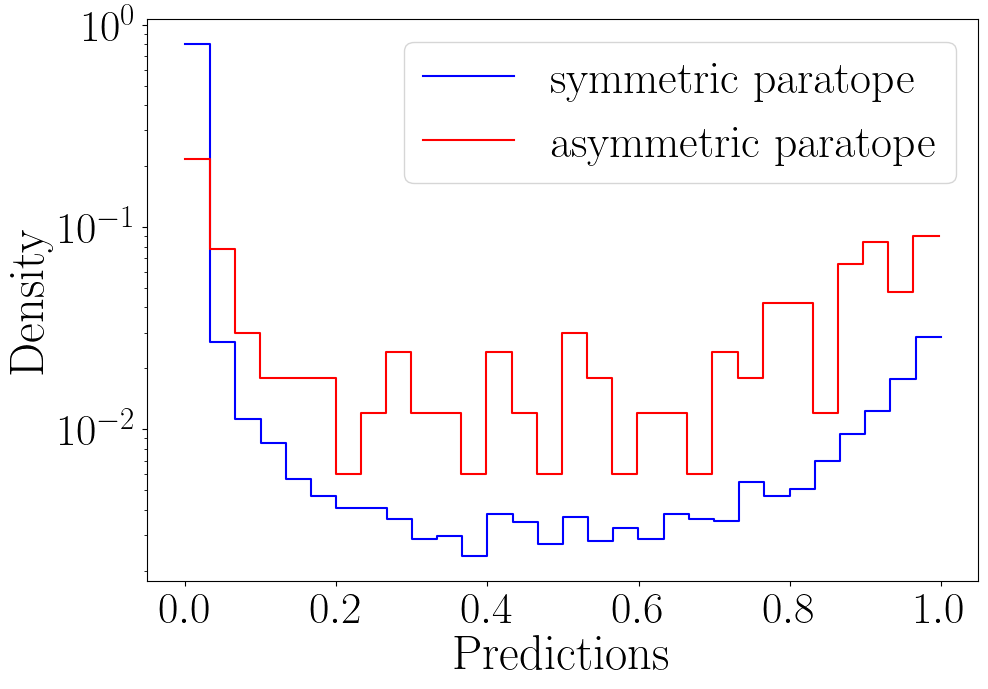

In [5]:
paragraph1 = f"/home/athenes/benchmark3/paragraph/paired_chain/250422/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_paragraph_test_limits1.csv"
paragraph2 = f"/home/athenes/benchmark3/paragraph/paired_chain/250422/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_paragraph_test_limits2.csv"
paragraph1 = pd.read_csv(paragraph1)
paragraph2 = pd.read_csv(paragraph2)
predictions = pd.merge(paragraph1, paragraph2[['pdb', 'IMGT', 'chain_type', 'prediction', 'labels']],
                    on=["pdb", "IMGT", "chain_type"],
                    how="left",
                    suffixes=("_llm1", "_llm2"))
predictions_equal = predictions[predictions['labels_llm1'] == predictions['labels_llm2']]
predictions_unequal = predictions[predictions['labels_llm1'] != predictions['labels_llm2']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))

# Overlay histograms with stat='probability' for normalization
sns.histplot(predictions_equal['prediction_llm1'], bins=30, stat='probability',
             color='blue', label='symmetric paratope', element='step', fill=False)

sns.histplot(predictions_unequal['prediction_llm1'], bins=30, stat='probability',
             color='red', label='asymmetric paratope', element='step', fill=False)

plt.xlabel('Predictions')
plt.ylabel('Density')
plt.legend()
plt.yscale("log")
plt.tight_layout()
plt.show()


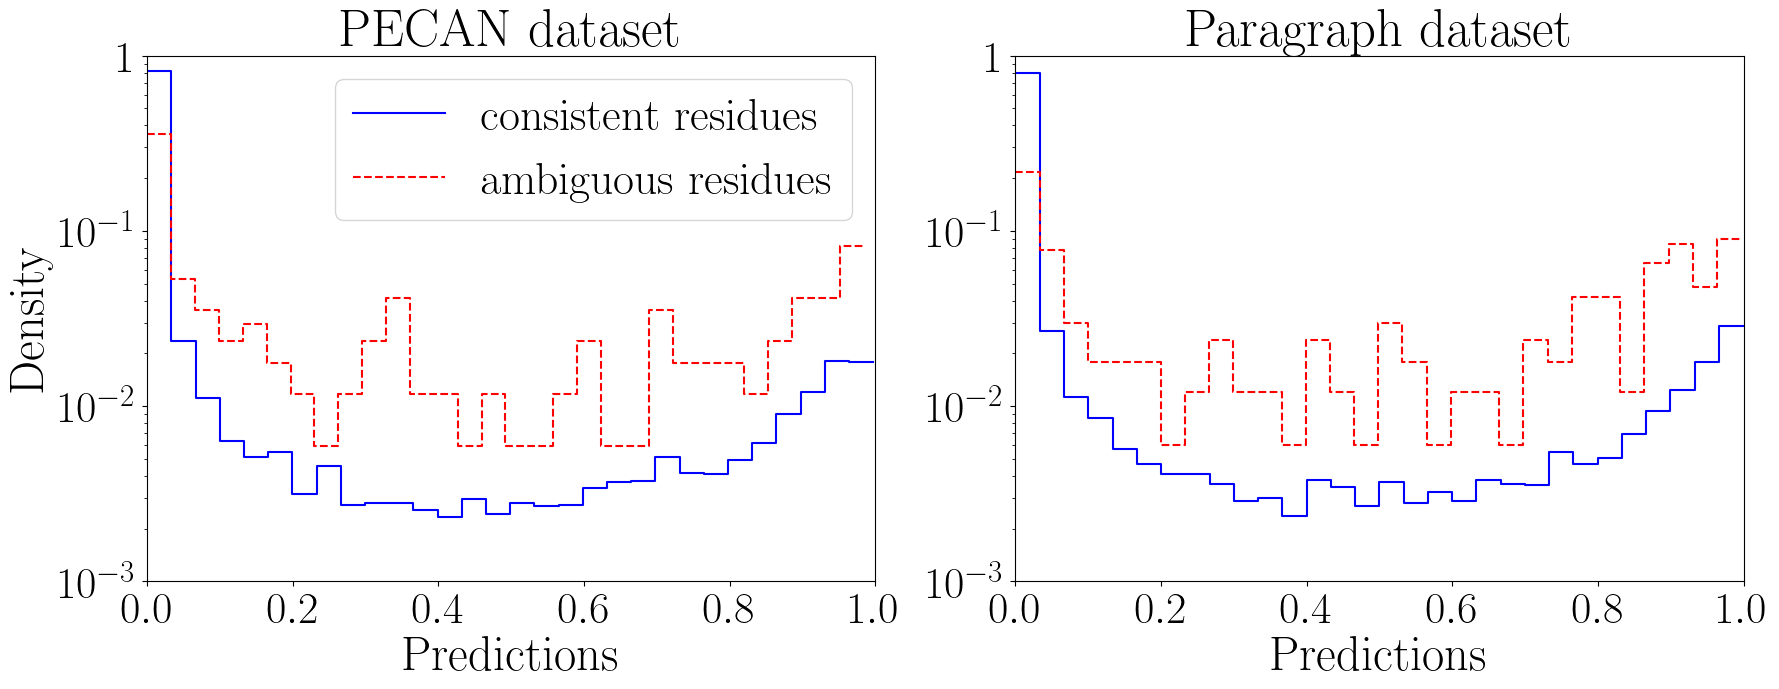

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatter


# File paths
pecan1 = f"/home/athenes/benchmark2/pecan/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_pecan_test_limits1.csv"
pecan2 = f"/home/athenes/benchmark2/pecan/250310_final/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_pecan_test_limits2.csv"
paragraph1 = "/home/athenes/benchmark3/paragraph/paired_chain/250422/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_paragraph_test_limits1.csv"
paragraph2 = "/home/athenes/benchmark3/paragraph/paired_chain/250422/lr-0.00005_dr-0.4,0.4,0.4_mk-0.4_bs-16_dim1-2000,1000,500_alphas-4,5,6_pen-0.00001_weight_1_emb_all_seed_1/prediction_paragraph_test_limits2.csv"
# Store pairs and labels
configs = [
    ("PECAN dataset", pecan1, pecan2),
    ("Paragraph dataset", paragraph1, paragraph2),
]

plt.figure(figsize=(18, 7))  # Adjusted for 2 subplots

for i, (title, file1, file2) in enumerate(configs, start=1):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    merged = pd.merge(
        df1,
        df2[['pdb', 'IMGT', 'chain_type', 'prediction', 'labels']],
        on=["pdb", "IMGT", "chain_type"],
        how="left",
        suffixes=("_llm1", "_llm2")
    )

    equal = merged[merged['labels_llm1'] == merged['labels_llm2']]
    unequal = merged[merged['labels_llm1'] != merged['labels_llm2']]

    ax=plt.subplot(1, 2, i)
    sns.histplot(equal['prediction_llm1'], bins=30, stat='probability',
                 color='blue', label='consistent residues', element='step', fill=False)
    sns.histplot(unequal['prediction_llm1'], bins=30, stat='probability',
                 color='red', label='ambiguous residues', element='step', fill=False)
    ax.lines[1].set_linestyle('--')  # dashed line for the first histogram
    ax.lines[1].set_linewidth(1.5)
    ax.set_yscale("log")
    ax.set_xlabel("Predictions")
    ax.set_xlim(0, 1)
    ax.set_title(title)

    # Set y-ticks and relabel 10^0 as 1
    ax.yaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
    y_labels = ax.get_yticks()
    y_labels_str = [str(int(y)) if y == 1 else f"$10^{{{int(np.log10(y))}}}$" for y in y_labels if y > 0]
    ax.set_yticks(y_labels)
    ax.set_yticklabels(y_labels_str)

    if i == 1:
        ax.set_ylabel("Density")
        ax.legend()
    else:
        ax.set_ylabel("")
    ax.set_ylim(1e-3,1)
plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/si_figure4.pdf", bbox_inches='tight')
plt.show()
